In [5]:
# Ashley Mayo
# December 28th, 2024
# Week 5 - 6
# DSC 640: Data Presentation and Visualization

In [19]:
# Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import squarify

In [7]:
# Load the uploaded files
file_paths = {
    "motherboard_data": './Motherboard VICE News Kia Hyundai Theft Data.xlsx',
    "kia_hyundai_thefts": './kiaHyundaiThefts.csv',
    "car_thefts_map": './carTheftsMap.csv',
    "milwaukee_data": './KiaHyundaiMilwaukeeData.csv',
}

In [8]:
# Load the datasets
motherboard_data = pd.ExcelFile(file_paths["motherboard_data"])
kia_hyundai_thefts = pd.read_csv(file_paths["kia_hyundai_thefts"])
car_thefts_map = pd.read_csv(file_paths["car_thefts_map"])
milwaukee_data = pd.read_csv(file_paths["milwaukee_data"])

In [9]:
# Display sheet names and previews to understand the content
{
    "motherboard_sheets": motherboard_data.sheet_names,
    "kia_hyundai_thefts_head": kia_hyundai_thefts.head(),
    "car_thefts_map_head": car_thefts_map.head(),
    "milwaukee_data_head": milwaukee_data.head()
}

{'motherboard_sheets': ['Data'],
 'kia_hyundai_thefts_head':   month  year     city state  countKiaHyundaiThefts  countOtherThefts  \
 0   Jan  2019  Atlanta    GA                     17               264   
 1   Feb  2019  Atlanta    GA                     11               205   
 2   Mar  2019  Atlanta    GA                     18               181   
 3   Apr  2019  Atlanta    GA                     15               223   
 4   May  2019  Atlanta    GA                     16               277   
 
    percentKiaHyundai  
 0              0.060  
 1              0.051  
 2              0.090  
 3              0.063  
 4              0.055  ,
 'car_thefts_map_head':   agency_ori           geo_name countCarThefts2019 countCarThefts2020  \
 0  MO0490300        Carthage PD                 62                 58   
 1        NaN   Warren County SO                112                 94   
 2    TX06802          Odessa PD                499                464   
 3  MO0530000  Laclede County 

In [11]:
# Check and clean numeric columns in the datasets

# Clean the Kia Hyundai dataset
kia_hyundai_thefts['countKiaHyundaiThefts'] = pd.to_numeric(kia_hyundai_thefts['countKiaHyundaiThefts'], errors='coerce')
kia_hyundai_thefts['countOtherThefts'] = pd.to_numeric(kia_hyundai_thefts['countOtherThefts'], errors='coerce')

# Clean the Car Thefts Map dataset
for col in ['countCarThefts2019', 'countCarThefts2020', 'countCarThefts2021', 'countCarThefts2022']:
    car_thefts_map[col] = pd.to_numeric(car_thefts_map[col], errors='coerce')

# Recalculate trends now that columns are numeric
kia_hyundai_yearly = (
    kia_hyundai_thefts.groupby(['year'])
    .agg({'countKiaHyundaiThefts': 'sum', 'countOtherThefts': 'sum'})
    .reset_index()
)
kia_hyundai_yearly['percentKiaHyundai'] = (
    kia_hyundai_yearly['countKiaHyundaiThefts'] /
    (kia_hyundai_yearly['countKiaHyundaiThefts'] + kia_hyundai_yearly['countOtherThefts'])
) * 100

car_thefts_yearly = car_thefts_map[['countCarThefts2019', 'countCarThefts2020', 'countCarThefts2021', 'countCarThefts2022']].sum().reset_index()
car_thefts_yearly.columns = ['year', 'total_thefts']
car_thefts_yearly['year'] = car_thefts_yearly['year'].str.extract('(\d+)$').astype(int)
car_thefts_yearly['percent_change'] = car_thefts_yearly['total_thefts'].pct_change() * 100

milwaukee_yearly = (
    milwaukee_data.groupby(['year'])
    .agg({'countKiaHyundaiThefts': 'sum', 'countOtherThefts': 'sum'})
    .reset_index()
)
milwaukee_yearly['percentKiaHyundai'] = (
    milwaukee_yearly['countKiaHyundaiThefts'] /
    (milwaukee_yearly['countKiaHyundaiThefts'] + milwaukee_yearly['countOtherThefts'])
) * 100

# Preview the cleaned trends for further analysis
kia_hyundai_yearly, car_thefts_yearly, milwaukee_yearly

<>:24: SyntaxWarning: invalid escape sequence '\d'
<>:24: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ashle\AppData\Local\Temp\ipykernel_2176\738027239.py:24: SyntaxWarning: invalid escape sequence '\d'
  car_thefts_yearly['year'] = car_thefts_yearly['year'].str.extract('(\d+)$').astype(int)


(   year  countKiaHyundaiThefts  countOtherThefts  percentKiaHyundai
 0  2019                   1866             33598           5.261674
 1  2020                   2497             42712           5.523237
 2  2021                   2907             46549           5.877952
 3  2022                  16339             53123          23.522214,
    year  total_thefts  percent_change
 0  2019      312064.0             NaN
 1  2020      360135.0       15.404212
 2  2021      394954.0        9.668319
 3  2022      465650.0       17.899806,
    year  countKiaHyundaiThefts  countOtherThefts  percentKiaHyundai
 0  2019                    207              3281           5.934633
 1  2020                    895              3649          19.696303
 2  2021                   6971              3507          66.529872
 3  2022                   4679              3377          58.080933)

In [24]:
# Ensure year column is numeric
kia_hyundai_yearly['year'] = pd.to_numeric(kia_hyundai_yearly['year'], errors='coerce')
milwaukee_yearly['year'] = pd.to_numeric(milwaukee_yearly['year'], errors='coerce')

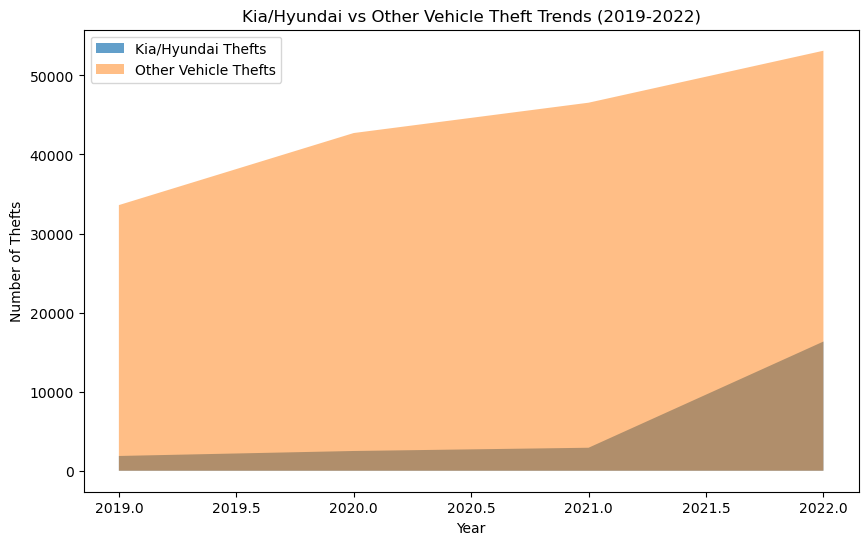

In [25]:
# Visualization 1: Area Chart for Kia/Hyundai Theft Trends
plt.figure(figsize=(10, 6))
plt.fill_between(kia_hyundai_yearly['year'], kia_hyundai_yearly['countKiaHyundaiThefts'], label="Kia/Hyundai Thefts", alpha=0.7)
plt.fill_between(kia_hyundai_yearly['year'], kia_hyundai_yearly['countOtherThefts'], label="Other Vehicle Thefts", alpha=0.5)
plt.title("Kia/Hyundai vs Other Vehicle Theft Trends (2019-2022)")
plt.xlabel("Year")
plt.ylabel("Number of Thefts")
plt.legend()
plt.show()

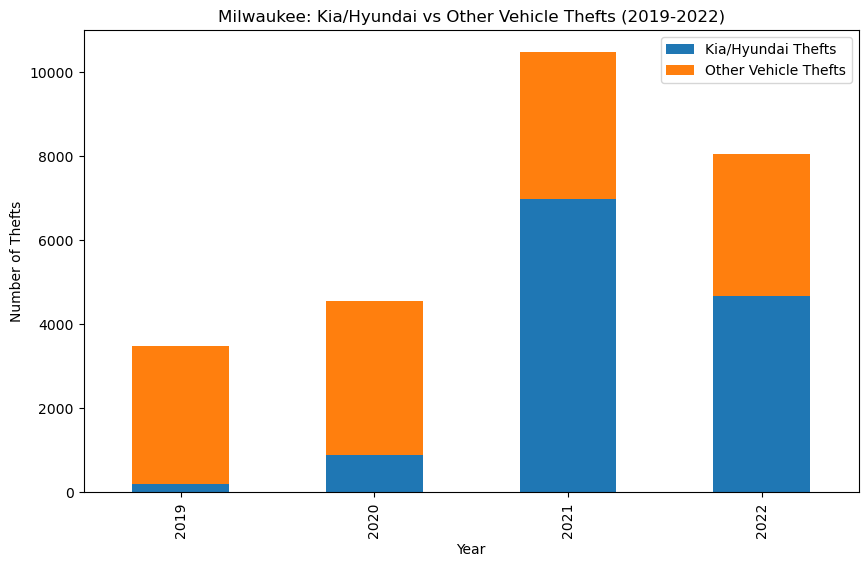

In [26]:
# Visualization 2: Stacked Bar Chart for Milwaukee Trends
milwaukee_yearly_plot = milwaukee_yearly[['countKiaHyundaiThefts', 'countOtherThefts']]
milwaukee_yearly_plot.index = milwaukee_yearly['year']

milwaukee_yearly_plot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Milwaukee: Kia/Hyundai vs Other Vehicle Thefts (2019-2022)")
plt.xlabel("Year")
plt.ylabel("Number of Thefts")
plt.legend(["Kia/Hyundai Thefts", "Other Vehicle Thefts"])
plt.show()

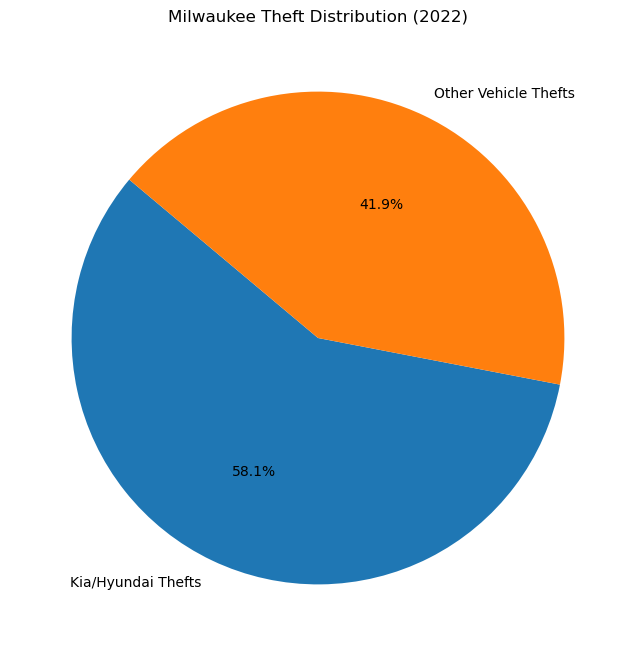

In [27]:
# Visualization 3: Pie Chart for 2022 Milwaukee Theft Distribution
theft_2022 = milwaukee_yearly[milwaukee_yearly['year'] == 2022]
labels = ['Kia/Hyundai Thefts', 'Other Vehicle Thefts']
sizes = [theft_2022['countKiaHyundaiThefts'].values[0], theft_2022['countOtherThefts'].values[0]]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Milwaukee Theft Distribution (2022)")
plt.show()

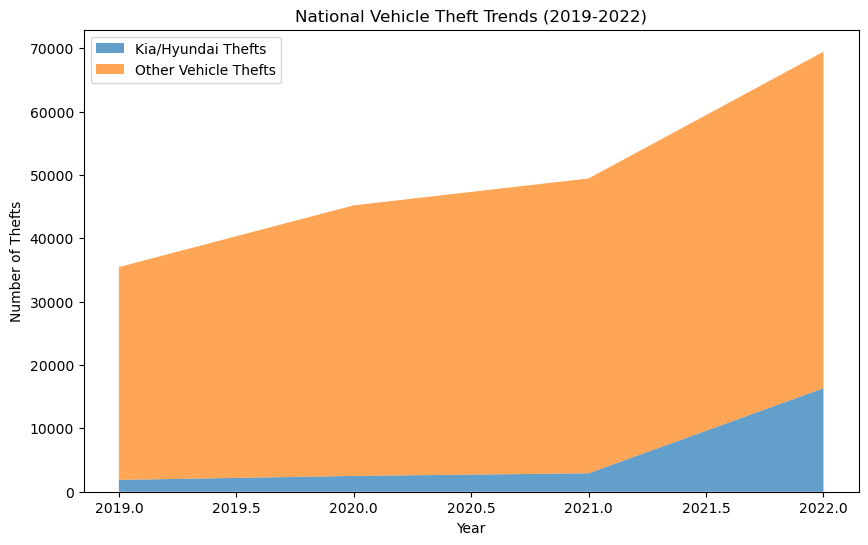

In [35]:
# Visualization 4: Tree Map for National Total Theft Percentages
percentages = kia_hyundai_yearly[['countKiaHyundaiThefts', 'countOtherThefts']].sum()
labels = ['Kia/Hyundai Thefts', 'Other Vehicle Thefts']
sizes = percentages.values
sizes_labels = [f"{label}\n{size}" for label, size in zip(labels, sizes)]

plt.figure(figsize=(10, 6))
squarify.plot(sizes=sizes, label=sizes_labels, alpha=.8)
plt.title("National Vehicle Theft Totals (2019-2022)")
plt.axis('off')
plt.show()

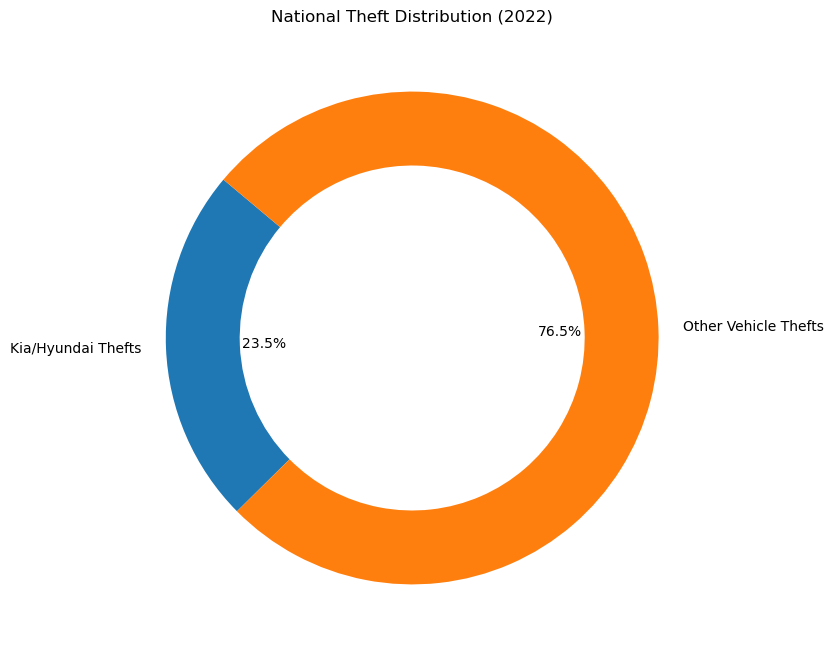

In [34]:
# Visualization 5: Donut Chart for National Theft Composition in 2022
theft_2022_national = kia_hyundai_yearly[kia_hyundai_yearly['year'] == 2022]
sizes = [theft_2022_national['countKiaHyundaiThefts'].values[0], theft_2022_national['countOtherThefts'].values[0]]
labels = ['Kia/Hyundai Thefts', 'Other Vehicle Thefts']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title("National Theft Distribution (2022)")
plt.show()

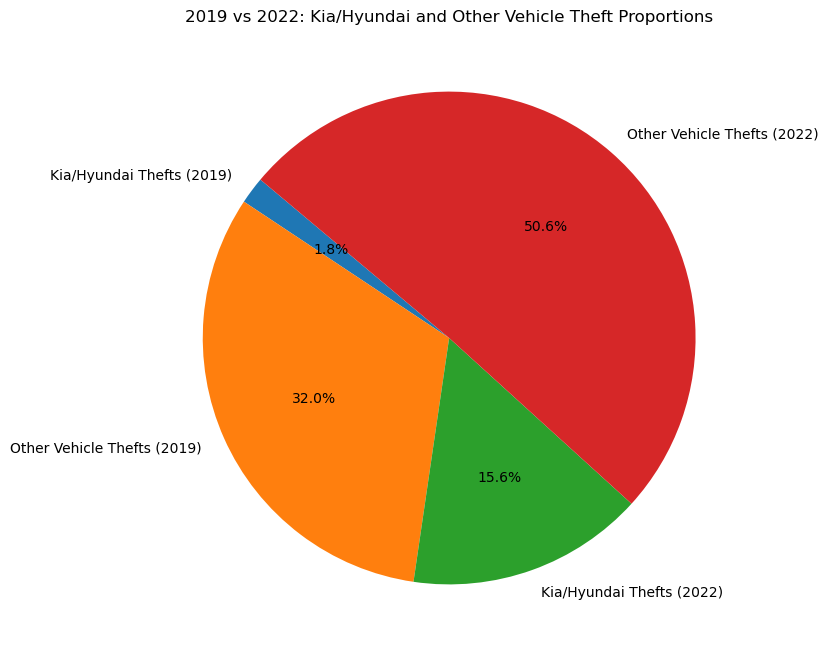

In [36]:
# Visualization 6: Pie Chart Comparing 2019 vs 2022 Theft Proportions for Kia/Hyundai
theft_comparison = kia_hyundai_yearly[kia_hyundai_yearly['year'].isin([2019, 2022])]
labels = ['Kia/Hyundai Thefts (2019)', 'Other Vehicle Thefts (2019)', 
          'Kia/Hyundai Thefts (2022)', 'Other Vehicle Thefts (2022)']
sizes = [
    theft_comparison.iloc[0]['countKiaHyundaiThefts'],
    theft_comparison.iloc[0]['countOtherThefts'],
    theft_comparison.iloc[1]['countKiaHyundaiThefts'],
    theft_comparison.iloc[1]['countOtherThefts']
]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("2019 vs 2022: Kia/Hyundai and Other Vehicle Theft Proportions")
plt.show()